<a href="https://colab.research.google.com/github/Marchosh/BaseballAttendance_Pred_MinneMUDAC/blob/main/MinneMudac_BaseballAttendanceUpdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


,Date,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium
0,0,2023,NYA,SFN,0,0,0,Yankee Stadium
1,0,2023,WAS,ATL,0,0,0,Nationals Park
2,0,2023,SDN,COL,0,0,0,Petco Park
3,0,2023,CHN,MIL,0,0,0,Wrigley Field
4,0,2023,BOS,BAL,0,0,0,Fenway Park
...,...,...,...,...,...,...,...,...
2425,0,2023,BAL,BOS,1,0,0,Oriole Park at Camden Yards
2426,0,2023,PIT,MIA,1,0,0,PNC Park
2427,0,2023,TOR,TBA,1,0,0,Rogers Centre
2428,0,2023,NYN,PHI,1,0,0,Citi Field


In [19]:
df2023 = pd.read_csv('/content/MLB_good.csv')
df2023.head()

,Date,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium
0,0,2023,NYA,SFN,0,0,0,Yankee Stadium
1,0,2023,WAS,ATL,0,0,0,Nationals Park
2,0,2023,SDN,COL,0,0,0,Petco Park
3,0,2023,CHN,MIL,0,0,0,Wrigley Field
4,0,2023,BOS,BAL,0,0,0,Fenway Park


In [20]:
df2023.drop(columns='Date', inplace=True)

In [4]:
df = pd.read_excel('/content/Final_dataset (1).xlsx', sheet_name='GameLog_fromoriginal')

In [5]:
location = pd.read_excel('/content/Final_dataset (1).xlsx', sheet_name='Location_HT')

In [6]:
df.head()

,Date,Year,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,...,HomeTeam_Player7_ID,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Acquisition_Information
0,2000-03-29,2000,0,Wed,CHN,NL,1,NYN,NL,1,...,zeilt001,Todd Zeile,3,ordor001,Rey Ordonez,6,hampm001,Mike Hampton,1,Y
1,2000-03-30,2000,0,Thu,NYN,NL,2,CHN,NL,2,...,husoj001,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,Y
2,2000-04-03,2000,0,Mon,COL,NL,1,ATL,NL,1,...,peree002,Eddie Perez,2,weisw001,Walt Weiss,6,maddg002,Greg Maddux,1,Y
3,2000-04-03,2000,0,Mon,MIL,NL,1,CIN,NL,1,...,boona001,Aaron Boone,5,tuckm001,Michael Tucker,7,harnp001,Pete Harnisch,1,Y
4,2000-04-03,2000,0,Mon,SFN,NL,1,MIA,NL,1,...,browb003,Brant Brown,9,redmm001,Mike Redmond,2,ferna001,Alex Fernandez,1,Y


In [7]:
location.head()

,Tname,TeamAbb,Stadium,City,State,Capacity,RoofType
0,Arizona Diamond Backs,ANA,Chase field,Phoenix,AZ,48405,R
1,Atlanta Braves,ARI,Truist Park,Cumberland,GA,41084,O
2,Baltimore Orioles,ATL,Oriole Park at Camden Yards,Baltimore,MD,44970,O
3,Boston Red Sox,BAL,Fenway Park,Boston,MA,37755,O
4,Chicago Cubs,BOS,Wrigley Field,Chicago,IL,41649,O


In [9]:
df.columns

Index(['Date', 'Year', 'NumberofGames', 'DayofWeek', 'VisitingTeam',
       'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam',
       'HomeTeamLeague', 'HomeTeamGameNumber',
       ...
       'HomeTeam_Player7_ID', 'HomeTeam_Player7_Name',
       'HomeTeam_Player7_Position', 'HomeTeam_Player8_ID',
       'HomeTeam_Player8_Name', 'HomeTeam_Player8_Position',
       'HomeTeam_Player9_ID', 'HomeTeam_Player9_Name',
       'HomeTeam_Player9_Position', 'Acquisition_Information'],
      dtype='object', length=151)

In [11]:
df2 = df[['Year',	'HomeTeam',	'VisitingTeam',	'DayofWeek',	'DayNight',	'Attendance']]
df2.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance
0,2000,NYN,CHN,Wed,N,55000.0
1,2000,CHN,NYN,Thu,N,55000.0
2,2000,ATL,COL,Mon,D,42255.0
3,2000,CIN,MIL,Mon,D,55596.0
4,2000,MIA,SFN,Mon,N,35101.0


In [12]:
merged_df = pd.merge(df2, location, left_on='HomeTeam', right_on='TeamAbb')
merged_df.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Tname,TeamAbb,Stadium,City,State,Capacity,RoofType
0,2000,NYN,CHN,Wed,N,55000.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
1,2000,NYN,SDN,Mon,D,52308.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
2,2000,NYN,SDN,Wed,N,17585.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
3,2000,NYN,SDN,Thu,N,17482.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
4,2000,NYN,LAN,Fri,N,27791.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O


In [14]:
merged_df.isnull().sum()

Year              0
HomeTeam          0
VisitingTeam      0
DayofWeek         0
DayNight          0
Attendance      900
Tname             0
TeamAbb           0
Stadium           0
City              0
State             0
Capacity          0
RoofType          0
dtype: int64

In [15]:
merged_df.dropna()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Tname,TeamAbb,Stadium,City,State,Capacity,RoofType
0,2000,NYN,CHN,Wed,N,55000.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
1,2000,NYN,SDN,Mon,D,52308.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
2,2000,NYN,SDN,Wed,N,17585.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
3,2000,NYN,SDN,Thu,N,17482.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
4,2000,NYN,LAN,Fri,N,27791.0,New York Yankees,NYN,Yankee Stadium,Bronx,NY,46537,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54340,2022,CLE,KCA,Sat,N,26982.0,Colorado Rockies,CLE,Coors Field,Denver,CO,50144,O
54341,2022,CLE,KCA,Sun,D,20622.0,Colorado Rockies,CLE,Coors Field,Denver,CO,50144,O
54342,2022,CLE,KCA,Mon,N,18688.0,Colorado Rockies,CLE,Coors Field,Denver,CO,50144,O
54343,2022,CLE,KCA,Tue,N,19455.0,Colorado Rockies,CLE,Coors Field,Denver,CO,50144,O


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54345 entries, 0 to 54344
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          54345 non-null  int64  
 1   HomeTeam      54345 non-null  object 
 2   VisitingTeam  54345 non-null  object 
 3   DayofWeek     54345 non-null  object 
 4   DayNight      54345 non-null  object 
 5   Attendance    53445 non-null  float64
 6   Tname         54345 non-null  object 
 7   TeamAbb       54345 non-null  object 
 8   Stadium       54345 non-null  object 
 9   City          54345 non-null  object 
 10  State         54345 non-null  object 
 11  Capacity      54345 non-null  int64  
 12  RoofType      54345 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.8+ MB


In [21]:
merged_df.drop(columns=['Tname',	'TeamAbb', 'City', 'State'], inplace=True)

In [22]:
PredictedDf = pd.merge(df2023, location, left_on='HomeTeam', right_on='TeamAbb', how='left')

In [23]:
PredictedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2430 entries, 0 to 2429
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2430 non-null   int64 
 1   HomeTeam      2430 non-null   object
 2   VisitingTeam  2430 non-null   object
 3   DayofWeek     2430 non-null   int64 
 4   DayNight      2430 non-null   int64 
 5   Attendance    2430 non-null   int64 
 6   Stadium_x     2430 non-null   object
 7   Tname         2430 non-null   object
 8   TeamAbb       2430 non-null   object
 9   Stadium_y     2430 non-null   object
 10  City          2430 non-null   object
 11  State         2430 non-null   object
 12  Capacity      2430 non-null   int64 
 13  RoofType      2430 non-null   object
dtypes: int64(5), object(9)
memory usage: 284.8+ KB


In [24]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2430 non-null   int64 
 1   HomeTeam      2430 non-null   object
 2   VisitingTeam  2430 non-null   object
 3   DayofWeek     2430 non-null   int64 
 4   DayNight      2430 non-null   int64 
 5   Attendance    2430 non-null   int64 
 6   Stadium       2430 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.0+ KB


In [26]:
PredictedDf.drop(columns=['Tname',	'TeamAbb', 'City', 'State'], inplace=True)

In [27]:
PredictedDf.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium_x,Stadium_y,Capacity,RoofType
0,2023,NYA,SFN,0,0,0,Yankee Stadium,Citi Field,41922,O
1,2023,WAS,ATL,0,0,0,Nationals Park,Nationals Park,41339,O
2,2023,SDN,COL,0,0,0,Petco Park,Petco Park,40209,O
3,2023,CHN,MIL,0,0,0,Wrigley Field,Great American Ball Park,42319,O
4,2023,BOS,BAL,0,0,0,Fenway Park,Wrigley Field,41649,O


In [28]:
merged_df.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium,Capacity,RoofType
0,2000,NYN,CHN,Wed,N,55000.0,Yankee Stadium,46537,O
1,2000,NYN,SDN,Mon,D,52308.0,Yankee Stadium,46537,O
2,2000,NYN,SDN,Wed,N,17585.0,Yankee Stadium,46537,O
3,2000,NYN,SDN,Thu,N,17482.0,Yankee Stadium,46537,O
4,2000,NYN,LAN,Fri,N,27791.0,Yankee Stadium,46537,O


##Change dayofweek and daynight

In [35]:
Weekday = ['Tue', 'Wed', 'Thu', 'Mon']
Weekend = ['Fri', 'Sat', 'Sun']

def Weeks(day):
    if day in Weekday:
        return 0
    elif day in Weekend:
        return 1
    else:
        return 'none'

merged_df['DayofWeek'] = merged_df['DayofWeek'].apply(Weeks)

In [36]:
DAY = ['N']

def Day(day):
    if day in DAY:
        return 1
    else:
      return 0

merged_df['DayNight'] = merged_df['DayNight'].apply(Day)

In [37]:
merged_df.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium,Capacity,RoofType
0,2000,NYN,CHN,0,1,55000.0,Yankee Stadium,46537,O
1,2000,NYN,SDN,0,0,52308.0,Yankee Stadium,46537,O
2,2000,NYN,SDN,0,1,17585.0,Yankee Stadium,46537,O
3,2000,NYN,SDN,0,1,17482.0,Yankee Stadium,46537,O
4,2000,NYN,LAN,1,1,27791.0,Yankee Stadium,46537,O


In [29]:
PredictedDf.drop(columns = 'Stadium_y', inplace=True)

In [30]:
PredictedDf.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium_x,Capacity,RoofType
0,2023,NYA,SFN,0,0,0,Yankee Stadium,41922,O
1,2023,WAS,ATL,0,0,0,Nationals Park,41339,O
2,2023,SDN,COL,0,0,0,Petco Park,40209,O
3,2023,CHN,MIL,0,0,0,Wrigley Field,42319,O
4,2023,BOS,BAL,0,0,0,Fenway Park,41649,O


In [31]:
# rename the 'B' column to 'D'
PredictedDf = PredictedDf.rename(columns={'Stadium_x': 'Stadium'})
PredictedDf.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium,Capacity,RoofType
0,2023,NYA,SFN,0,0,0,Yankee Stadium,41922,O
1,2023,WAS,ATL,0,0,0,Nationals Park,41339,O
2,2023,SDN,COL,0,0,0,Petco Park,40209,O
3,2023,CHN,MIL,0,0,0,Wrigley Field,42319,O
4,2023,BOS,BAL,0,0,0,Fenway Park,41649,O


In [38]:
dfall = pd.concat([merged_df, PredictedDf])

In [39]:
dfall.head()

,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium,Capacity,RoofType
0,2000,NYN,CHN,0,1,55000.0,Yankee Stadium,46537,O
1,2000,NYN,SDN,0,0,52308.0,Yankee Stadium,46537,O
2,2000,NYN,SDN,0,1,17585.0,Yankee Stadium,46537,O
3,2000,NYN,SDN,0,1,17482.0,Yankee Stadium,46537,O
4,2000,NYN,LAN,1,1,27791.0,Yankee Stadium,46537,O


In [40]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56775 entries, 0 to 2429
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          56775 non-null  int64  
 1   HomeTeam      56775 non-null  object 
 2   VisitingTeam  56775 non-null  object 
 3   DayofWeek     56775 non-null  int64  
 4   DayNight      56775 non-null  int64  
 5   Attendance    55875 non-null  float64
 6   Stadium       56775 non-null  object 
 7   Capacity      56775 non-null  int64  
 8   RoofType      56775 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.3+ MB


#dummy varaible

In [41]:
dummy_df = pd.get_dummies(dfall[['HomeTeam', 'VisitingTeam', 'Stadium', 'RoofType']])

In [42]:
df_trans = pd.concat([dummy_df, dfall], axis=1)

In [43]:
df_trans.head()

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,RoofType_R,Year,HomeTeam,VisitingTeam,DayofWeek,DayNight,Attendance,Stadium,Capacity,RoofType
0,0,0,0,0,0,0,0,0,0,0,...,0,2000,NYN,CHN,0,1,55000.0,Yankee Stadium,46537,O
1,0,0,0,0,0,0,0,0,0,0,...,0,2000,NYN,SDN,0,0,52308.0,Yankee Stadium,46537,O
2,0,0,0,0,0,0,0,0,0,0,...,0,2000,NYN,SDN,0,1,17585.0,Yankee Stadium,46537,O
3,0,0,0,0,0,0,0,0,0,0,...,0,2000,NYN,SDN,0,1,17482.0,Yankee Stadium,46537,O
4,0,0,0,0,0,0,0,0,0,0,...,0,2000,NYN,LAN,1,1,27791.0,Yankee Stadium,46537,O


In [44]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56775 entries, 0 to 2429
Columns: 107 entries, HomeTeam_ANA to RoofType
dtypes: float64(1), int64(4), object(4), uint8(98)
memory usage: 9.6+ MB


In [45]:
df_trans.drop(columns=['HomeTeam', 'VisitingTeam', 'Stadium', 'RoofType'], inplace=True)

In [46]:
df_trans.head()

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,Year,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,55000.0,46537
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,0,52308.0,46537
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17585.0,46537
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17482.0,46537
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,1,1,27791.0,46537


In [50]:
df_trans.columns

Index(['HomeTeam_ANA', 'HomeTeam_ARI', 'HomeTeam_ATL', 'HomeTeam_BAL',
       'HomeTeam_BOS', 'HomeTeam_CHA', 'HomeTeam_CHN', 'HomeTeam_CIN',
       'HomeTeam_CLE', 'HomeTeam_COL',
       ...
       'Stadium_Yankee Stadium', 'Stadium_loanDepot park', 'RoofType_F',
       'RoofType_O', 'RoofType_R', 'Year', 'DayofWeek', 'DayNight',
       'Attendance', 'Capacity'],
      dtype='object', length=103)

In [51]:
# normalize the 'B' column
df_trans['Capacity'] = df_trans['Capacity'].apply(lambda x: (x - df_trans['Capacity'].min()) / (df_trans['Capacity'].max() - df_trans['Capacity'].min()))


In [52]:
df_trans.head()

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,Year,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,55000.0,0.694742
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,0,52308.0,0.694742
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17585.0,0.694742
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17482.0,0.694742
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,1,1,27791.0,0.694742


In [97]:
df_trans.dropna(inplace=True)

#SPlitting

In [108]:
df_trans.reset_index(inplace=True)

df_trans

,level_0,index,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,...,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,Year,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,55000.0,0.694742
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,0,52308.0,0.694742
2,2,2,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17585.0,0.694742
3,3,3,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17482.0,0.694742
4,4,4,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,1,1,27791.0,0.694742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,55870,56770,0,0,0,1,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.411452
55871,55871,56771,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.443452
55872,55872,56772,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,1,0,0.0,0.532258
55873,55873,56773,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.694742


In [110]:
df_trans

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,Year,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,55000.0,0.694742
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,0,52308.0,0.694742
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17585.0,0.694742
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,0,1,17482.0,0.694742
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,2000,1,1,27791.0,0.694742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.411452
55871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.443452
55872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,1,0,0.0,0.532258
55873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,1,0,0.0,0.694742


In [109]:
#df_trans.drop(columns=['level_0', 'index'], inplace=True)

In [111]:
df_transTrain = df_trans[df_trans['Year'] != 2023]
Pred = df_trans[df_trans['Year'] == 2023]

In [112]:
Train = df_transTrain[df_transTrain['Year'] != 2022]
Test = df_transTrain[df_transTrain['Year'] == 2022]

In [113]:
#drop the year
Train.drop(columns = 'Year', inplace=True)
Test.drop(columns = 'Year', inplace=True)

<ipython-input-113-bffdc9e3f913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop(columns = 'Year', inplace=True)
<ipython-input-113-bffdc9e3f913>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(columns = 'Year', inplace=True)


In [114]:
Train.reset_index(inplace=True)
Train.drop(columns = 'index', inplace=True)
Train

<ipython-input-114-bfef2d107d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train.drop(columns = 'index', inplace=True)


,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Wrigley Field,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,55000.0,0.694742
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,52308.0,0.694742
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,17585.0,0.694742
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,17482.0,0.694742
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,27791.0,0.694742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51011,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,11336.0,0.811097
51012,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,18576.0,0.811097
51013,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,24082.0,0.811097
51014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,21957.0,0.811097


In [115]:
Test.reset_index(inplace=True)
Test.drop(columns = 'index', inplace=True)
Test

<ipython-input-115-3486be0697ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test.drop(columns = 'index', inplace=True)


,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Wrigley Field,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,DayofWeek,DayNight,Attendance,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,43820.0,0.694742
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,37935.0,0.694742
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,24515.0,0.694742
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0.0,0.694742
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,27490.0,0.694742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,26982.0,0.811097
2425,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,20622.0,0.811097
2426,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,18688.0,0.811097
2427,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,19455.0,0.811097


In [116]:
train_y = Train['Attendance']
train_x = Train.drop(columns=['Attendance'])

In [117]:
test_y = Test['Attendance']
test_x = Test.drop(columns=['Attendance'])

In [118]:
test_y

0       43820.0
1       37935.0
2       24515.0
3           0.0
4       27490.0
         ...   
2424    26982.0
2425    20622.0
2426    18688.0
2427    19455.0
2428    12983.0
Name: Attendance, Length: 2429, dtype: float64

In [119]:
train_x

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Truist Park,Stadium_Wrigley Field,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,DayofWeek,DayNight,Capacity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.694742
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.694742
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.694742
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.694742
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0.694742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51011,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0.811097
51012,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0.811097
51013,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0.811097
51014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0.811097


#Model LGBM

In [140]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a LightGBM dataset from the training data
train_data = lgb.Dataset(train_x, label=train_y)

# Define the hyperparameter space for the grid search
param_grid = {'num_leaves': [10, 20, 30, 50, 100],
              'max_depth': [5, 10, 15, 20, 50, 100]}

# Specify the hyperparameters for the model
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': ['rmse', 'R-squared', 'MAPE']}

# Create a LightGBM model
model = lgb.LGBMRegressor(**params)

# Create a grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 10, 'num_leaves': 10}


In [141]:
# Train the model with the best hyperparameters
model = lgb.LGBMRegressor(**params, **best_params)
model.fit(train_x, train_y)

# Make predictions on the validation set
y_pred = model.predict(test_x)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(test_y, y_pred, squared=False)
print('RMSE:', rmse)

# Calculate the R-squared
r2 = r2_score(test_y, y_pred)
print('R-squared:', r2)

RMSE: 8249.211631711607
R-squared: 0.4922443141656283


In [143]:
compare = pd.DataFrame()

compare['y_test'] = test_y
compare['y_pred'] = y_pred

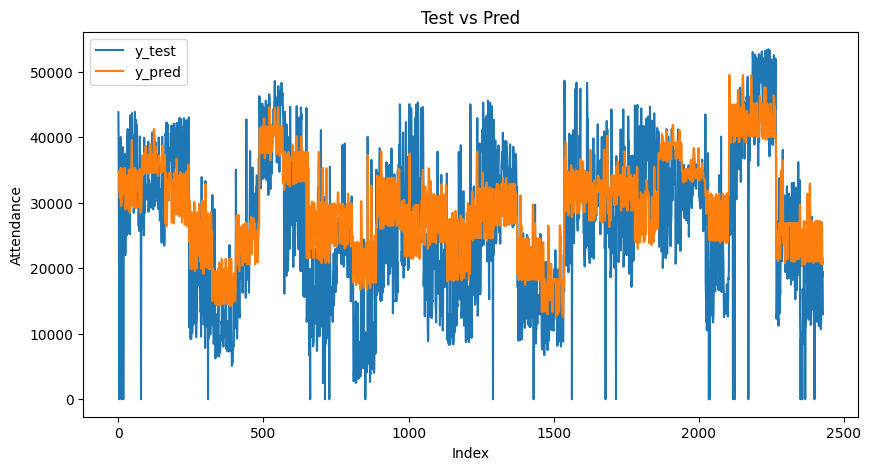

In [144]:
import matplotlib.pyplot as plt

compare[['y_test', 'y_pred']].plot(figsize=(10, 5))
plt.title('Test vs Pred')
plt.xlabel('Index')
plt.ylabel('Attendance')

# Show the chart
plt.show()

#Pred 2023

In [124]:
Pred.drop(columns='Attendance', inplace=True)

<ipython-input-124-d1ba1424dc61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pred.drop(columns='Attendance', inplace=True)


In [128]:
Pred.drop(columns='Year', inplace=True)

<ipython-input-128-6e7eb274b04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pred.drop(columns='Year', inplace=True)


In [126]:
Pred.head()

,HomeTeam_ANA,HomeTeam_ARI,HomeTeam_ATL,HomeTeam_BAL,HomeTeam_BOS,HomeTeam_CHA,HomeTeam_CHN,HomeTeam_CIN,HomeTeam_CLE,HomeTeam_COL,...,Stadium_Wrigley Field,Stadium_Yankee Stadium,Stadium_loanDepot park,RoofType_F,RoofType_O,RoofType_R,Year,DayofWeek,DayNight,Capacity
53445,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,2023,0,0,0.545871
53446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2023,0,0,0.527065
53447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2023,0,0,0.490613
53448,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,2023,0,0,0.558677
53449,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,2023,0,0,0.537065


In [129]:
# make predictions on new data
# ... additional preprocessing as necessary ...
new_pred = model.predict(Pred)

In [147]:
new_pred.to_csv('result_update.csv')

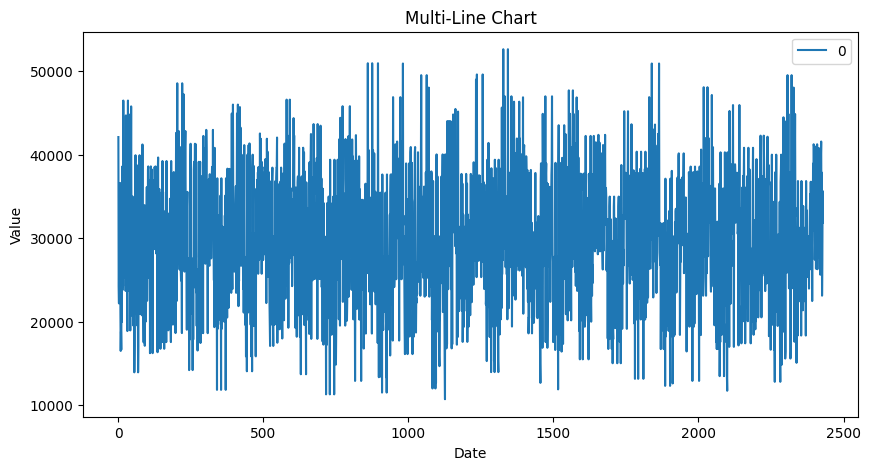

In [136]:
import matplotlib.pyplot as plt


new_pred = pd.DataFrame(new_pred)
new_pred.plot(figsize=(10, 5))
plt.title('Multi-Line Chart')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the chart
plt.show()

#XGBOOST

In [145]:
from xgboost import XGBRegressor

xgb_params = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [146]:
xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring='neg_root_mean_squared_error', cv=5)
xgb_grid.fit(train_x, train_y)

KeyboardInterrupt: ignored

In [ ]:
xgb_pred = xgb_grid.predict(test_x)
xgb_rmse = mean_squared_error(test_y, xgb_pred, squared=False)
print("XGBoost RMSE:", xgb_rmse)
